<a href="https://colab.research.google.com/github/InhuKim/ai/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import os
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from itertools import product


from glob import glob
import pandas as pd
import cv2
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

from torch.autograd import Variable

import torchvision.models as models
from torchvision import transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device} device")

Using cuda device


In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.empty_cache()

In [ ]:
CFG = {
    'IMG_SIZE':256,
    'EPOCHS':50,
    'PATIENCE':5,
    'class':14
}

### data

In [ ]:
def get_train_data(data_dir):
    img_path_list = []
    label_list = []
    
    image_path = os.path.join(data_dir, 'training')
    
    for product_name in os.listdir(image_path):
        product_path = os.path.join(image_path, product_name)
        if os.path.isdir(product_path):
            # get image path
            img_path_list.extend(glob(os.path.join(product_path, '*.jpg')))
            img_path_list.extend(glob(os.path.join(product_path, '*.png')))
            label = list(product_name[:5])
            
            # get label
            label_list.append(''.join(label))
                
    return img_path_list, label_list

In [ ]:
img_list, label_list = get_train_data('/content/drive/MyDrive/Colab_Notebooks/data/product_data/')

In [ ]:
def data_blanced(img, label):
    x = []
    y = []
    
    for i in range(CFG['class']):
        _img = img[(i * 114): ((i + 1) * 114)]
        _label = label[i]
        
        for img_product in _img:
            x.append(img_product)
            y.append(_label)
            
    return x, y

In [ ]:
x, y = data_blanced(img_list, label_list)

In [ ]:
le = preprocessing.LabelEncoder()
targets = le.fit_transform(y)
targets = torch.as_tensor(targets)

In [ ]:
label_list

['35585',
 '35584',
 '45030',
 '45658',
 '45660',
 '45659',
 '25222',
 '25228',
 '35211',
 '45657',
 '55701',
 '55034',
 '55702',
 '45661']

In [ ]:
one_hot_y = F.one_hot(targets)

In [ ]:
one_hot_y.shape

torch.Size([1596, 14])

In [ ]:
def get_valid_data(data_dir):
    img_valid_list = []
    label_valid_list = []
    
    image_path = os.path.join(data_dir, 'validation')
    
    for product_name in os.listdir(image_path):
        product_path = os.path.join(image_path, product_name)
        if os.path.isdir(product_path):
            # get image path
            img_valid_list.extend(glob(os.path.join(product_path, '*.jpg')))
            img_valid_list.extend(glob(os.path.join(product_path, '*.png')))
            label = list(product_name[:5])
            
            # get label
            label_valid_list.append(''.join(label))
                
    return img_valid_list, label_valid_list

In [ ]:
def valid_data_blanced(img, label):
    x = []
    y = []
    
    for i in range(CFG['class']):
        _img = img[(i * 15): ((i + 1) * 15)]
        _label = label[i]
        
        for img_product in _img:
            x.append(img_product)
            y.append(_label)
            
    return x, y

In [ ]:
img_valid_list, label_valid_list = get_valid_data('/content/drive/MyDrive/Colab_Notebooks/data/product_data/')

In [ ]:
x_valid, y_valid = valid_data_blanced(img_valid_list, label_valid_list)

In [ ]:
len(label_valid_list)

14

In [ ]:
le2 = preprocessing.LabelEncoder()
targets_y = le2.fit_transform(y_valid)
targets_y = torch.as_tensor(targets_y)
one_hot_valid_y = F.one_hot(targets_y)

In [ ]:
one_hot_valid_y.shape

torch.Size([210, 14])

In [ ]:
test_path = '/content/drive/MyDrive/Colab_Notebooks/data/test_img'
def get_test_data(data_dir):
    img_test_list = []
    label_test_list = []
    
    product_path = data_dir
    img_test_list.extend(glob(os.path.join(product_path, '*.jpg')))
    img_test_list.extend(glob(os.path.join(product_path, '*.png')))
    
    print(img_test_list)
                
    return img_test_list, label_test_list

In [ ]:
img_test_list, label_test_list = get_test_data(test_path)

['/content/drive/MyDrive/Colab_Notebooks/data/test_img/25222_2.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/55701_4.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/35211_1.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/45660_2.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/35211_4.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/55702_3.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/45659_1.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/55701_1.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/35585_1.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/25222_4.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/55701_2.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/45657_2.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/35211_2.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/test_img/25222_1.jpg', '/content/drive/MyDrive/Colab_Notebooks/data/te

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, img_path_list, label_list, train_mode=True, transforms=None):
        self.transforms = transforms
        self.train_mode = train_mode
        self.img_path_list = img_path_list
        self.label_list = label_list

    def __getitem__(self, index):
        img_path = self.img_path_list[index]
        # Get image data
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transforms is not None:
            image = self.transforms(image)

        if self.train_mode:
            label = self.label_list[index]
            return image, label
        else:
            return image
    
    def __len__(self):
        return len(self.img_path_list)

In [ ]:
train_transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize((256, 256)),
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                    ])

test_transform = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize((256, 256)),
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                    ])

In [ ]:
train_dataset = CustomDataset(x, one_hot_y, train_mode=True, transforms=train_transform)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True, num_workers=0, collate_fn=None)

vali_dataset = CustomDataset(x_valid, one_hot_valid_y, train_mode=True, transforms=test_transform)
vali_loader = DataLoader(vali_dataset, batch_size = 5, shuffle=False, num_workers=0, collate_fn=None)

test_dataset = CustomDataset(img_test_list, label_test_list, train_mode=False, transforms=test_transform)
test_loader = DataLoader(test_dataset, batch_size = 31, shuffle=False, num_workers=0, collate_fn=None)

In [ ]:
def draw_graph(title, loss, valid_loss):
    plt.plot(loss, label="Training Loss")
    plt.plot(valid_loss, label="Validation Loss")
    plt.legend(loc='upper right')
    plt.title(title)
    plt.savefig("/content/drive/MyDrive/project/result/loss_chart/" + title + ".png")
    plt.show()

### model

In [ ]:
class ResNet50(torch.nn.Module):
    def __init__(self):
        super(ResNet50, self).__init__()
        model = models.resnet50(pretrained=True)
        modules = list(model.children())[:-1]
        self.feature_extract = nn.Sequential(*modules)
        self.fc1 = nn.Linear(2048, 1000)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(1000,CFG['class'])

    def forward(self, x):
        x = self.feature_extract(x)
        # x = x.mean(dim=(-2, -1))
        # (batch, 2048, 4, 4)
        x = torch.squeeze(x)
        x = self.relu(self.fc1(x))
        out = self.fc2(x)
        return out

In [ ]:
class EfficientNetb4(torch.nn.Module):
    def __init__(self):
        super(EfficientNetb4, self).__init__()
        model = models.efficientnet_b4(pretrained=True)
        modules = list(model.children())[:-1]
        self.feature_extract = nn.Sequential(*modules)
        self.fc1 = nn.Linear(1792, 1000)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1000, CFG['class'])
        # self.softmax = nn.Softmax(dim=0)
        
    def forward(self, x):
        x = self.feature_extract(x)
        # (batch, 1792, 1, 1)
        x = torch.squeeze(x)
        x = self.relu(self.fc1(x))
        out = self.fc2(x)
        # out = self.softmax(out)
        
        return out

In [ ]:
class RegNet(torch.nn.Module):
    def __init__(self):
        super(RegNet, self).__init__()
        model = models.regnet_y_16gf(pretrained=True)
        modules = list(model.children())[:-1]
        self.feature_extract = nn.Sequential(*modules)
        self.fc1 = nn.Linear(3024, 1000)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1000, CFG['class'])
        # self.softmax = nn.Softmax(dim=0)
        
    def forward(self, x):
        x = self.feature_extract(x)
        # (batch, 3024, 1, 1)
        x = torch.squeeze(x)
        x = self.relu(self.fc1(x))
        out = self.fc2(x)
        # out = self.softmax(out)
        
        return out

# 성능 평가

In [ ]:
PARAMS = {
    'models' : ['ResNet50', 'EfficientNetb4', 'RegNet'],
    # 'models' : ['ResNet50'],
    # 'learning_rate' : [1e-3, 1e-4, 1e-5],
    'learning_rate' : [1e-5],
    # 'optimizer' : ['Lamb', 'adam', 'rmsprop', 'nadam', ],
    'optimizer' : ['adam','rmsprop', 'nadam', 'lamb'],
    'scheduler' : ['CosineAnnealing']
}
hyper_params=list(product(PARAMS['models'], PARAMS['learning_rate'],PARAMS['optimizer'], PARAMS['scheduler']))

In [ ]:
def predict(model, test_loader, device):
    model.eval()
    model_pred = []
    with torch.no_grad():
        for img in tqdm(iter(test_loader)):
            img = img.float().to(device)
            
            pred_logit = model(img)
            pred_logit = pred_logit.squeeze().detach().cpu()
            
            model_pred.extend(pred_logit)
    return model_pred

In [ ]:
def get_test_label(data_dir):
    img_test_list = []
    label_test_list = []
    
    product_path = data_dir
    product_name = glob(os.path.join(product_path, '*.jpg'))
    img_test_list.extend(glob(os.path.join(product_path, '*.jpg')))
    img_test_list.extend(glob(os.path.join(product_path, '*.png')))
            # get image path
    for j in range(len(product_name)):
        label = list(product_name[j][-11:-6])
        label_test_list.append(''.join(label))
                
    return label_test_list

In [ ]:
test_label = get_test_label(test_path)
test_label

['25222',
 '55701',
 '35211',
 '45660',
 '35211',
 '55702',
 '45659',
 '55701',
 '35585',
 '25222',
 '55701',
 '45657',
 '35211',
 '25222',
 '45660',
 '45661',
 '45030',
 '45657',
 '25228',
 '25222',
 '55701',
 '45657',
 '35584',
 '45661',
 '35211',
 '55034',
 '45030',
 '55702',
 '35584',
 '55702',
 '45659']

In [ ]:
label = ['35585',
 '35584',
 '45030',
 '45658',
 '45660',
 '45659',
 '25222',
 '25228',
 '35211',
 '45657',
 '55701',
 '55034',
 '55702',
 '45661']

In [ ]:
checkpoint = torch.load('/content/drive/MyDrive/project/saved_models/ResNet50_1e-05_Lamb_CosineAnnealing_example.pth')
checkpoint2 = torch.load('/content/drive/MyDrive/project/saved_models/EfficientNetb4_0.001_adam_CosineAnnealing_example.pth')
checkpoint3 = torch.load('/content/drive/MyDrive/project/saved_models/RegNet_1e-05_adam_CosineAnnealing_example.pth')

title = 'ResNet50_1e-05_Lamb'

resnet_model = ResNet50().to(device)
resnet_model.load_state_dict(checkpoint)

# effinet_model = EfficientNetb4().to(device)
# effinet_model.load_state_dict(checkpoint2)

# regnet_model = RegNet().to(device)
# regnet_model.load_state_dict(checkpoint3)


<All keys matched successfully>

In [ ]:
preds = predict(resnet_model, test_loader, device)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
len(preds)

31

In [ ]:
result = []
for i in range(len(preds)):
    out = preds[i].argmax()
    result.append(out.tolist())


In [ ]:
prediction = []
for k in result:
    out = label[k]
    prediction.append(out)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

accuracy_score(prediction, test_label)

0.03225806451612903

In [ ]:
a = confusion_matrix(prediction, test_label)

In [ ]:
a

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

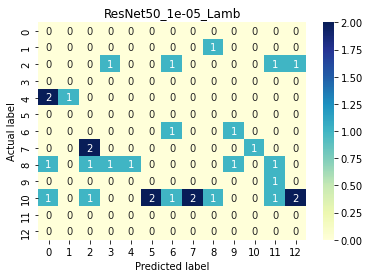

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

splot = sns.heatmap(pd.DataFrame(a), annot=True, cmap="YlGnBu", fmt='g')
plt.title(title, y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
sfig = splot.get_figure()
sfig.savefig('/content/drive/MyDrive/project/result/confusion_matrix/' + title + 'confusion matrix.png')